En esta historia, analizaremos el método ‘get_dummies’ de Pandas. ‘get_dummies’ de Pandas es la forma más sencilla de implementar el método de codificación *one-hot* y tiene parámetros muy útiles, de los cuales mencionaremos los más importantes. Con ‘get_dummies’ podemos obtener un DataFrame con codificación ‘one-hot’ (variables ficticias) en una sola fila.

Usaremos los datos de ‘car_price.csv’ para esta demostración.

El propósito de este proceso de ciencia de datos es predecir los precios de los automóviles. Utilizaremos Regresión Lineal para estos datos, pero los datos no están listos para el modelo de aprendizaje automático. Esto se debe a que hay columnas categóricas (no numéricas) y necesitamos transformarlas. Para ello, implementaremos ‘get_dummies’.


In [47]:
import numpy as np
import pandas as pd
#from sklearn.preprocessing import OneHotEncoder

df = pd.read_csv('car_price.csv')
df.head()


,make_model,body_type,Body Color,km,hp,Gearing Type,Extras,price
0,Audi A1,Sedans,Black,56013,85,Automatic,"Alloy wheels,Catalytic Converter,Voice Control",15770
1,Audi A1,Sedans,Red,80000,85,Automatic,"Alloy wheels,Sport seats,Sport suspension,Voic...",14500
2,Audi A1,Sedans,Black,83450,85,Automatic,"Alloy wheels,Voice Control",14640
3,Audi A1,Sedans,Brown,73000,85,Automatic,"Alloy wheels,Sport seats,Voice Control",14500
4,Audi A1,Sedans,Black,16200,85,Automatic,"Alloy wheels,Sport package,Sport suspension,Vo...",16790


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4800 entries, 0 to 4799
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   make_model    4800 non-null   object
 1   body_type     4800 non-null   object
 2   Body Color    4800 non-null   object
 3   km            4800 non-null   int64 
 4   hp            4800 non-null   int64 
 5   Gearing Type  4800 non-null   object
 6   Extras        4800 non-null   object
 7   price         4800 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 300.1+ KB


Como puedes ver, los datos no tienen valores faltantes y adquirí esta estructura después de manejar los valores atípicos. 

Tenemos 5 columnas categóricas que necesitamos convertir a formato numérico antes de aplicar el algoritmo de aprendizaje automático. Estas columnas son: "make_model", "body_type", "Body Color", "Gear Type" y "Extras"; todas ellas son datos nominales. Por ejemplo, para "Body Color" no hay una jerarquía entre los colores. El negro no tiene superioridad sobre el rojo. Por eso, debemos usar codificación *one-hot*.

Primero aplicaremos ‘get_dummies’ solo a la columna "Body Color" para ver los detalles de ‘get_dummies’, luego utilizaremos todo el DataFrame.


### 1. get_dummies()

In [24]:
df['Body Color'].unique()

array(['Black', 'Red', 'Brown', 'White', 'Grey', 'Blue', 'Silver',
       'Beige', 'Violet', 'Yellow', 'Green', 'Bronze', 'Orange'],
      dtype=object)

La columna “Body Color” tiene 13 valores únicos, lo que significa que obtendremos 13 columnas después de aplicar ‘get_dummies’.
Con la siguiente sintaxis, podemos aplicar ‘get_dummies’ a una columna del DataFrame.

In [25]:
pd.get_dummies(df['Body Color']).astype(int)

,Beige,Black,Blue,Bronze,Brown,Green,Grey,Orange,Red,Silver,Violet,White,Yellow
0,0,1,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,1,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4795,0,0,0,0,0,0,0,0,0,0,0,1,0
4796,0,0,0,0,0,0,0,0,0,0,0,1,0
4797,0,0,0,0,0,0,0,0,0,1,0,0,0
4798,0,0,0,0,0,0,0,0,0,1,0,0,0


No usamos ningún parámetro, ‘get_dummies’ tiene parámetros predeterminados. Como puedes ver, obtuvimos un DataFrame de 13 columnas después de aplicar ‘get_dummies’. Hay 4800 filas. Podemos ver el color del automóvil. Por ejemplo, el color del primer automóvil es negro, el color del segundo automóvil es rojo, etc.

Nuestro DataFrame original, ‘df’, mantiene su forma. Debemos fusionar estos DataFrames. Ahora podemos asignar las variables dummy (codificación *one-hot*) de "Body Color" a un nuevo DataFrame para fusionarlo con el DataFrame principal.


In [26]:
df_colors = pd.get_dummies(df['Body Color'])
df.head()

,make_model,body_type,Body Color,km,hp,Gearing Type,Extras,price
0,Audi A1,Sedans,Black,56013,85,Automatic,"Alloy wheels,Catalytic Converter,Voice Control",15770
1,Audi A1,Sedans,Red,80000,85,Automatic,"Alloy wheels,Sport seats,Sport suspension,Voic...",14500
2,Audi A1,Sedans,Black,83450,85,Automatic,"Alloy wheels,Voice Control",14640
3,Audi A1,Sedans,Brown,73000,85,Automatic,"Alloy wheels,Sport seats,Voice Control",14500
4,Audi A1,Sedans,Black,16200,85,Automatic,"Alloy wheels,Sport package,Sport suspension,Vo...",16790


In [18]:
df_colors.head().astype(int)

,Beige,Black,Blue,Bronze,Brown,Green,Grey,Orange,Red,Silver,Violet,White,Yellow
0,0,1,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,1,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,0,0,0


Ahora los fusionaremos en DataFrames utilizando el método ‘join’. Pero deberíamos eliminar la columna "Body Color", ya que no la necesitamos más porque no es numérica.

In [19]:
df = (df.drop(['Body Color'], axis=1)).join(df_colors)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4800 entries, 0 to 4799
Data columns (total 20 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   make_model    4800 non-null   object
 1   body_type     4800 non-null   object
 2   km            4800 non-null   int64 
 3   hp            4800 non-null   int64 
 4   Gearing Type  4800 non-null   object
 5   Extras        4800 non-null   object
 6   price         4800 non-null   int64 
 7   Beige         4800 non-null   bool  
 8   Black         4800 non-null   bool  
 9   Blue          4800 non-null   bool  
 10  Bronze        4800 non-null   bool  
 11  Brown         4800 non-null   bool  
 12  Green         4800 non-null   bool  
 13  Grey          4800 non-null   bool  
 14  Orange        4800 non-null   bool  
 15  Red           4800 non-null   bool  
 16  Silver        4800 non-null   bool  
 17  Violet        4800 non-null   bool  
 18  White         4800 non-null   bool  
 19  Yellow

Con esta sintaxis, eliminamos la columna "Body Color" y añadimos nuestras variables dummy. Como puedes ver, todos los colores tienen una columna y los tipos de columna son numéricos.

### 2. get_dummies con el parámetro 'drop_first'

Una columna se transformó en 13 columnas. Podemos usar el parámetro ‘drop_first’ para reducir una columna. Podemos obtener 12 columnas. Normalmente, el valor predeterminado de este parámetro es ‘False’; solo lo configuramos en ‘True’. Veamos cómo funciona.

In [30]:
pd.get_dummies(df['Body Color']).astype(int)

,Beige,Black,Blue,Bronze,Brown,Green,Grey,Orange,Red,Silver,Violet,White,Yellow
0,0,1,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,1,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4795,0,0,0,0,0,0,0,0,0,0,0,1,0
4796,0,0,0,0,0,0,0,0,0,0,0,1,0
4797,0,0,0,0,0,0,0,0,0,1,0,0,0
4798,0,0,0,0,0,0,0,0,0,1,0,0,0


In [32]:
pd.get_dummies(df['Body Color'], drop_first=True).astype(int)

,Black,Blue,Bronze,Brown,Green,Grey,Orange,Red,Silver,Violet,White,Yellow
0,1,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,1,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
4795,0,0,0,0,0,0,0,0,0,0,1,0
4796,0,0,0,0,0,0,0,0,0,0,1,0
4797,0,0,0,0,0,0,0,0,1,0,0,0
4798,0,0,0,0,0,0,0,0,1,0,0,0


Revisa el número de columnas; en lugar de 13, obtuvimos 12 columnas. Esto elimina la primera columna del DataFrame generado por ‘get_dummies’. La primera columna para la columna "Body Color" es Beige. Si hay un coche beige, todas las columnas serán 0. Cuando todas las columnas son 0, el modelo sabe que es un coche beige. Consulta el ejemplo a continuación.

In [34]:
pd.get_dummies(df['Body Color']).loc[[133]].astype(int)

,Beige,Black,Blue,Bronze,Brown,Green,Grey,Orange,Red,Silver,Violet,White,Yellow
133,1,0,0,0,0,0,0,0,0,0,0,0,0


In [35]:
pd.get_dummies(df['Body Color'], drop_first=True).loc[[133]].astype(int)

,Black,Blue,Bronze,Brown,Green,Grey,Orange,Red,Silver,Violet,White,Yellow
133,0,0,0,0,0,0,0,0,0,0,0,0


Más columnas significan menor rendimiento y más tiempo de entrenamiento. Imagina que tenemos 20 columnas que no son numéricas. Si usamos ‘drop_first’, obtendremos 20 columnas menos. Por lo tanto, es útil usar el parámetro ‘drop_first’ para mejorar el rendimiento del modelo.

### 3. get_dummies con el parámetro 'prefix'

Si el DataFrame tuviera la columna “Upholstery Color”, también obtendríamos una columna para el color negro o marrón del tapizado después de aplicar ‘get_dummies’, además de la columna "Body Color". Múltiples columnas con el mismo nombre pueden causar problemas. Podemos usar el parámetro ‘prefix’ para evitar esta situación.

In [39]:
pd.get_dummies(df['Body Color'], drop_first=True, prefix='BC').astype(int)

,BC_Black,BC_Blue,BC_Bronze,BC_Brown,BC_Green,BC_Grey,BC_Orange,BC_Red,BC_Silver,BC_Violet,BC_White,BC_Yellow
0,1,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,1,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
4795,0,0,0,0,0,0,0,0,0,0,1,0
4796,0,0,0,0,0,0,0,0,0,0,1,0
4797,0,0,0,0,0,0,0,0,1,0,0,0
4798,0,0,0,0,0,0,0,0,1,0,0,0


Este parámetro añade la palabra como un prefijo con un guion bajo. Para el ejemplo anterior, hemos usado el prefijo BC.

### 4. get_dummies con el parámetro 'columns'

Podemos aplicar ‘get_dummies’ directamente a un DataFrame en lugar de aplicarlo individualmente. Esto añadirá automáticamente el nombre de la columna como un prefijo para cada variable dummy.

In [40]:
pd.get_dummies(df, drop_first=True).astype(int)

,km,hp,price,make_model_Audi A2,make_model_Audi A3,body_type_Convertible,body_type_Coupe,body_type_Off-Road,body_type_Other,body_type_Sedans,...,"Extras_Sport seats,Sport suspension,Voice Control","Extras_Sport seats,Sport suspension,Voice Control,Winter tyres","Extras_Sport seats,Voice Control",Extras_Sport suspension,"Extras_Sport suspension,Trailer hitch,Voice Control",Extras_Touch screen,"Extras_Touch screen,Voice Control",Extras_Trailer hitch,Extras_Voice Control,Extras_Winter tyres
0,56013,85,15770,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,80000,85,14500,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,83450,85,14640,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,73000,85,14500,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,16200,85,16790,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4795,54,85,25000,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4796,50,85,24980,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4797,6666,85,24980,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4798,10,85,24980,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


Pero el DataFrame evolucionó a 349 columnas porque la columna “Extras” tiene muchos valores únicos. Debemos considerar esta columna de manera individual. En este caso, podemos usar el parámetro ‘columns’.

In [46]:
pd.get_dummies(df, columns=['make_model','body_type','Body Color','Gearing Type'], drop_first=True)

,km,hp,Extras,price,make_model_Audi A2,make_model_Audi A3,body_type_Convertible,body_type_Coupe,body_type_Off-Road,body_type_Other,...,Body Color_Green,Body Color_Grey,Body Color_Orange,Body Color_Red,Body Color_Silver,Body Color_Violet,Body Color_White,Body Color_Yellow,Gearing Type_Manual,Gearing Type_Semi-automatic
0,56013,85,"Alloy wheels,Catalytic Converter,Voice Control",15770,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,80000,85,"Alloy wheels,Sport seats,Sport suspension,Voic...",14500,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
2,83450,85,"Alloy wheels,Voice Control",14640,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,73000,85,"Alloy wheels,Sport seats,Voice Control",14500,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,16200,85,"Alloy wheels,Sport package,Sport suspension,Vo...",16790,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4795,54,85,"Alloy wheels,Sport seats,Sport suspension,Voic...",25000,False,True,False,False,False,False,...,False,False,False,False,False,False,True,False,True,False
4796,50,85,Alloy wheels,24980,False,True,False,False,False,False,...,False,False,False,False,False,False,True,False,True,False
4797,6666,85,"Alloy wheels,Roof rack",24980,False,True,False,False,False,False,...,False,False,False,False,True,False,False,False,True,False
4798,10,85,"Alloy wheels,Roof rack",24980,False,True,False,False,False,False,...,False,False,False,False,True,False,False,False,True,False


Con el parámetro ‘columns’, podemos aplicar solo las columnas que deseamos. Así, podemos manejar columnas personalizadas más tarde con ‘str.get_dummies’.

### 5. str.get_dummies

El método ‘str.get_dummies’ es una versión de ‘get_dummies’ que se puede aplicar a una serie. Es una versión para el manejo de cadenas. El método ‘str.get_dummies()’ divide cada cadena en la serie dada utilizando el separador. Solo hay un parámetro de separador.

En este DataFrame, hay algunas características de los automóviles en la columna “Extras”. Por ejemplo: llantas de aleación, asientos deportivos, control por voz, etc. Estas características son importantes en términos de precio. A continuación, se muestra que hay 325 valores únicos. Sin embargo, hay 16 características adicionales. Los automóviles tienen un número diferente de características adicionales.


In [48]:
df['Extras'].unique()

array(['Alloy wheels,Catalytic Converter,Voice Control',
       'Alloy wheels,Sport seats,Sport suspension,Voice Control',
       'Alloy wheels,Voice Control',
       'Alloy wheels,Sport seats,Voice Control',
       'Alloy wheels,Sport package,Sport suspension,Voice Control',
       'Alloy wheels,Sport package,Sport seats,Sport suspension',
       'Alloy wheels', 'Alloy wheels,Shift paddles',
       'Alloy wheels,Catalytic Converter,Sport package,Sport seats,Sport suspension,Voice Control',
       'Alloy wheels,Sport seats,Sport suspension',
       'Alloy wheels,Sport package,Sport seats',
       'Alloy wheels,Sport package',
       'Alloy wheels,Catalytic Converter,Shift paddles,Voice Control',
       'Alloy wheels,Shift paddles,Sport package,Voice Control',
       'Alloy wheels,Catalytic Converter,Sport seats,Voice Control,Winter tyres',
       'Alloy wheels,Winter tyres', 'Alloy wheels,Catalytic Converter',
       'Catalytic Converter', 'Alloy wheels,Sport suspension',
       'Catal

In [49]:
df['Extras'].nunique()

325

Si aplicamos ‘get_dummies’ directamente, se añaden 325 columnas adicionales. Por lo tanto, tenemos que usar ‘str.get_dummies’. Usamos una coma (,) como separador porque los valores en los datos están separados por comas (,).

In [50]:
df['Extras'].str.get_dummies(',')

,Alloy wheels,Cab or rented Car,Catalytic Converter,Handicapped enabled,Right hand drive,Roof rack,Shift paddles,Ski bag,Sport package,Sport seats,Sport suspension,Touch screen,Trailer hitch,Tuned car,Voice Control,Winter tyres
0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
1,1,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
4,1,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4795,1,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0
4796,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4797,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4798,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


Como puedes ver, hay 16 características adicionales. Verifica la primera fila. Tiene llantas de aleación, convertidor catalítico y control de sonido; estos son 1, mientras que los demás son 0.

Ahora obtengamos la versión más reciente del DataFrame al fusionarlos.


In [51]:
df = pd.get_dummies(df, columns=['make_model','body_type','Body Color','Gearing Type'], drop_first=True)

In [52]:
df_extra = df['Extras'].str.get_dummies(',')

In [53]:
df_dummy = (df.drop(['Extras'], axis=1)).join(df_extra)

In [54]:
df_dummy.shape

(4800, 41)

In [55]:
df_dummy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4800 entries, 0 to 4799
Data columns (total 41 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   km                           4800 non-null   int64
 1   hp                           4800 non-null   int64
 2   price                        4800 non-null   int64
 3   make_model_Audi A2           4800 non-null   bool 
 4   make_model_Audi A3           4800 non-null   bool 
 5   body_type_Convertible        4800 non-null   bool 
 6   body_type_Coupe              4800 non-null   bool 
 7   body_type_Off-Road           4800 non-null   bool 
 8   body_type_Other              4800 non-null   bool 
 9   body_type_Sedans             4800 non-null   bool 
 10  body_type_Station wagon      4800 non-null   bool 
 11  Body Color_Black             4800 non-null   bool 
 12  Body Color_Blue              4800 non-null   bool 
 13  Body Color_Bronze            4800 non-null   boo

Todas las columnas son numéricas. Ahora nuestros datos están listos para el modelo.

### CONCLUSIÓN

‘pandas.get_dummies’ es el toque final en los datos antes de la modelización. Debido a que tenemos que convertir todas las columnas no numéricas en numéricas, debemos usar esta función u otro método para obtener las tablas de codificación o variables dummy. Pero, como puedes ver, ‘get_dummies’ es el método más fácil y cuenta con muchos parámetros que hacen que nuestro modelo sea más legible y fluido.
Importa los datos, maneja los valores faltantes y los valores atípicos, y luego aplica ‘get_dummies’. Estará listo para el modelo.


### Diferencias entre 'get_dummies' y 'one hot encoding'

Para los algoritmos de aprendizaje automático se deben convertir las variables categóricas a numéricas antes de crear un modelo. 

Este proceso de conversión de características categóricas en características numéricas se conoce como codificación de datos categóricos . Hay muchas técnicas de codificación disponibles, pero la técnica más común y ampliamente utilizada es  'One Hot Encoding'.

La popular biblioteca de aprendizaje automático de Python 'Scikit-learn' ofrece el método 'OneHotEncoder()' que se puede utilizar para la codificación One Hot.

Si una columna categórica tiene k categorías únicas, entonces la aplicación de la técnica de codificación 'one-hot' creará 'k' características. La columna original que se utiliza para la codificación one-hot debe ignorarse en el proceso posterior.

También existe el método de Pandas llamado 'get_dummies()' para la codificación 'One Hot'.

#### Ejemplo

Supongamos que la columna de categorías Aerolínea tiene tres categorías: United Airlines, Delta Air Lines y American Airlines. La codificación one-hot creará tres características, como se muestra a continuación.

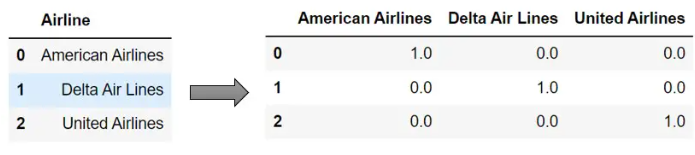

In [56]:
from PIL import Image
from IPython.display import display

# Cargar la imagen desde el archivo
img = Image.open('one_hot_get_dummies_img.png')

# Mostrar la imagen
display(img)


#### One Hot Encoding (Scikit-Learn)

One Hot Encoding (Scikit-Learn) Es una técnica general de 'scikit-learn' implementada en la clase 'OneHotEncoder' para transformar variables categóricas.


In [ ]:
# SINTAXIS:

from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder()
encoded = encoder.fit_transform(df[['columna']]).toarray()


#### Opciones

- Permite manejar más configuraciones avanzadas, como handle_unknown='ignore', que es útil para datos que pueden contener categorías desconocidas durante la inferencia.

- Ofrece el parámetro sparse_output para retornar un formato disperso, lo cual es eficiente en términos de memoria cuando hay muchas categorías.

Resultados: Retorna una matriz NumPy (por defecto) o un DataFrame si se especifica con pd.DataFrame.

#### get_dummies (Pandas)

El método 'get_dummies' de Pandas es otra forma de crear funciones codificadas one-hot. 

Es una función específica de Pandas que se utiliza para convertir variables categóricas en un conjunto de variables dummy (o variables binarias).

In [ ]:
# SINTAXIS:

pd.get_dummies(df['columna'])


#### Opciones

- Puedes especificar columnas específicas en un DataFrame con el parámetro columns.

- Tiene la opción de agregar un prefijo a las columnas usando el parámetro prefix.

- Permite eliminar una de las columnas dummy para evitar la multicolinealidad (es decir, la trampa de las variables ficticias) con el parámetro drop_first=True.

Resultados: Produce un DataFrame con columnas dummy para cada categoría en la columna original.

### Principales diferencias
1.  Librería: 'get_dummies' es parte de Pandas, mientras que 'One Hot Encoding' es parte de scikit-learn.

2. Formato de  Salida: 'get_dummies' devuelve un DataFrame de Pandas, mientras que 'OneHotEncoder' devuelve una matriz NumPy por defecto, aunque se puede ajustar para devolver un DataFrame.

3. Configurabilidad: Los 'get_dummies' no pueden manejar la categoría desconocida durante la transformación de forma nativa. Debes aplicar algunas técnicas para manejarla, pero no es eficiente. Por otro lado, OneHotEncoder manejará de forma nativa las categorías desconocidas. Todo lo que necesitas hacer es configurar el parámetro handle_unknown='ignore'en 'OneHotEncoder'.

4. Manejo de Multicolinealidad: 'get_dummies' tiene una opción directa (drop_first=True) para evitar la trampa de las variables ficticias, mientras que en OneHotEncoder esto se debe hacer manualmente.

5. Eficiencia en memoria: OneHotEncoder permite la opción de generar una salida en formato disperso (sparse_output=True), útil para conjuntos de datos con muchas categorías, mientras que get_dummies siempre genera un DataFrame denso.

6. Si desea poner en producción su modelo de aprendizaje automático, la línea de procesamiento de 'Scikit-learn' le resultará muy útil. Sin embargo, 'get_dummies' no es compatible con la línea de procesamiento de 'Scikit-learn'. Requiere que cree su propio transformador. Por otro lado, 'OneHotEncoder' es compatible con la línea de procesamiento de 'Scikit-learn'. 

### RESUMEN

'get_dummies' es más simple y directo para tareas básicas de preprocesamiento, mientras que 'OneHotEncoder' es más flexible y potente para flujos de trabajo más complejos de machine learning.